
<div class="alert alert-block alert-success">

# **1.** **Import Libraries**

<div>


In [638]:
# Add the parent directory to the path
import sys
import os
import ast
import pickle
sys.path.append(os.path.abspath('..'))

from utils import *

In [639]:
sns.set_theme(style="whitegrid", font_scale=1.2)


<div class="alert alert-block alert-success">

# **2.** **Configurations Comparison: analyzing combinations of selection methods and crossover and mutation operators**

<div>


## **2.1** Create Dictionary with Fitnesses Obtained for Each Combination

We have to combine all the results obtained in reach run of the configurations for each selection method.

In [640]:
df_ga = pd.read_csv('results/ga/results_all_selections.csv')

In [641]:
df_ga['Config'] = df_ga['Selection'] + '_' + df_ga['Crossover'] + '_' + df_ga['Mutation']

fitness_dfs = {}
for config_name, group in df_ga.groupby('Config'):
    all_runs = []
    
    for fitness_json in group['Gens_Best_Fitness']:
        # Parse fitness list (handle both stringified JSON and actual lists)
        if isinstance(fitness_json, str):
            fitness_list = json.loads(fitness_json)
        else:
            fitness_list = fitness_json  # already a list
        all_runs.append(fitness_list)

    fitness_results = pd.DataFrame(all_runs)
    fitness_dfs[config_name] = fitness_results

In [642]:
for key in fitness_dfs.keys():
    print(key)

fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation
fitness_proportionate_selection_pmx_crossover_n_swap_mutation
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation
fitness_proportionate_selection_pmx_crossover_scramble_mutation
ranking_selection_fitness_based_slot_crossover_n_swap_mutation
ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation
ranking_selection_fitness_based_slot_crossover_prime_slot_swap_mutation
ranking_selection_fitness_based_slot_crossover_scramble_mutation
ranking_selection_pmx_crossover_n_swap_mutation
ranking_selection_pmx_crossover_preserve_best_slots_mutation
ranking_sel

Checking if the format is correct:

In [643]:
fitness_dfs["tournament_selection_pmx_crossover_n_swap_mutation"]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.276950,1.313442,1.342088,1.394231,1.394231,1.421575,1.448718,1.448718,1.448718,1.497317,...,1.602115,1.602115,1.602115,1.602115,1.602115,1.602115,1.602115,1.602115,1.602115,1.602115
1,1.325975,1.379263,1.379263,1.412175,1.446405,1.446405,1.453118,1.453118,1.492834,1.492834,...,1.578031,1.578031,1.578031,1.578031,1.578031,1.578031,1.578031,1.578031,1.578031,1.578031
2,1.254070,1.311927,1.311927,1.368264,1.368264,1.385833,1.385833,1.385833,1.385833,1.385833,...,1.530833,1.530833,1.530833,1.530833,1.530833,1.550833,1.573690,1.573690,1.573690,1.573690
3,1.328292,1.328292,1.335632,1.379006,1.379006,1.379006,1.406520,1.417060,1.428663,1.454203,...,1.568145,1.568145,1.568145,1.568145,1.568145,1.568145,1.568145,1.568145,1.568145,1.568145
4,1.300119,1.300119,1.428461,1.428461,1.428461,1.450091,1.465719,1.465719,1.465719,1.496433,...,1.585517,1.585517,1.585517,1.585517,1.585517,1.585517,1.585517,1.585517,1.585517,1.589803
5,1.236817,1.265984,1.323324,1.369610,1.369610,1.438896,1.480577,1.480577,1.480577,1.480577,...,1.604345,1.633631,1.633631,1.633631,1.633631,1.633631,1.633631,1.633631,1.633631,1.633631
6,1.263493,1.344349,1.387605,1.410632,1.410632,1.410632,1.450462,1.450462,1.473489,1.473489,...,1.553429,1.553429,1.553429,1.553429,1.553429,1.553429,1.553429,1.553429,1.553429,1.553429
7,1.251607,1.282408,1.308974,1.322088,1.372688,1.372688,1.381259,1.389345,1.462088,1.463145,...,1.579775,1.579775,1.579775,1.579775,1.579775,1.579775,1.579775,1.579775,1.579775,1.579775
8,1.327175,1.330032,1.349002,1.375032,1.375032,1.375032,1.426117,1.463631,1.468974,1.492060,...,1.559290,1.559290,1.559290,1.559290,1.559290,1.559290,1.559290,1.559290,1.559290,1.559290
9,1.369688,1.379688,1.379688,1.381117,1.453974,1.453974,1.490403,1.490403,1.496117,1.510403,...,1.606145,1.606145,1.606145,1.606145,1.606145,1.606145,1.606145,1.606145,1.606145,1.606145


## **2.2** Configurations' Comparison by Selection Method

### **2.2.1** Collecting the data

In [644]:
fitprop_fitness_dfs = {
    k: v for k, v in fitness_dfs.items()
    if k.startswith('fitness_proportionate_selection')
}

ranking_fitness_dfs = {
    k: v for k, v in fitness_dfs.items()
    if k.startswith('ranking_selection')
}

tournament_fitness_dfs = {
    k: v for k, v in fitness_dfs.items()
    if k.startswith('tournament_selection')
}

### **2.2.2** Mean/Median Fitness over Generation Line Charts

In [645]:
plot_fitness(fitness_dfs, title_suffix='All Selection Methods')
plot_fitness(fitprop_fitness_dfs, title_suffix='Fitness-Proportionate Selection')
plot_fitness(ranking_fitness_dfs, title_suffix='Ranking Selection')
plot_fitness(tournament_fitness_dfs, title_suffix='Tournament Selection')

### **2.2.3** Standard Deviation (Box Plot)

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




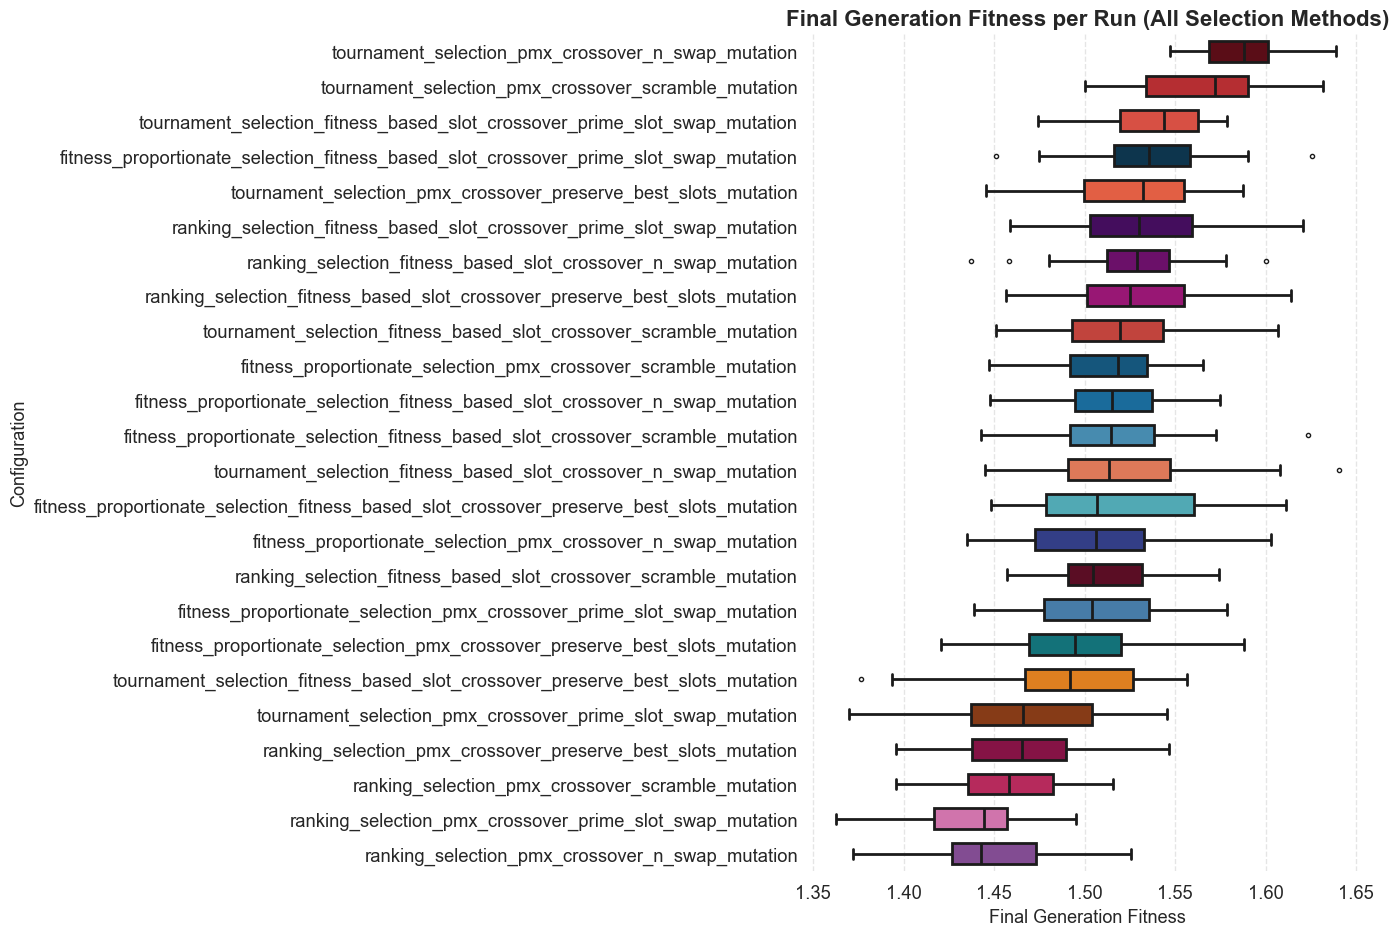

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




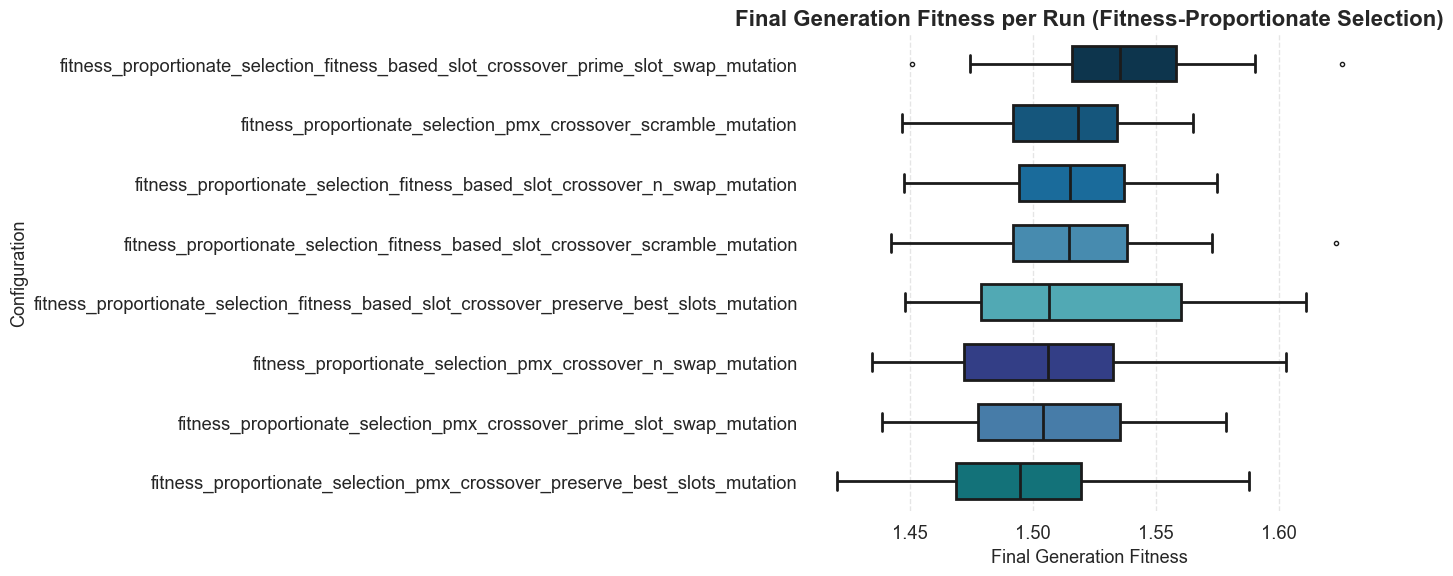

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




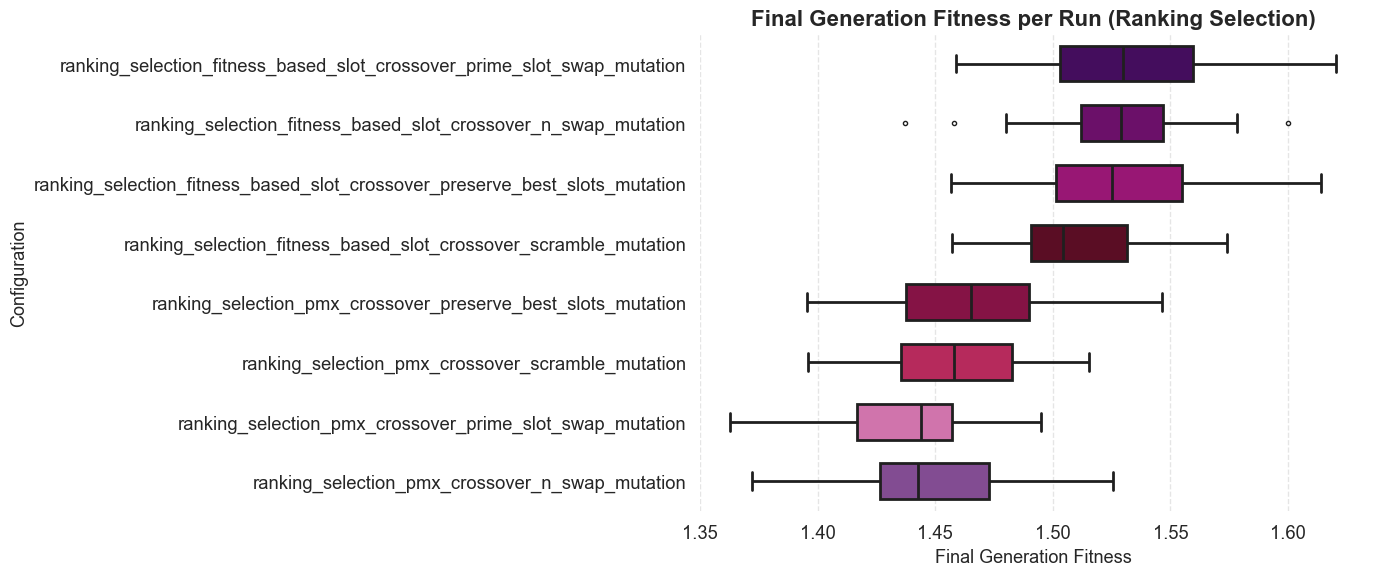

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




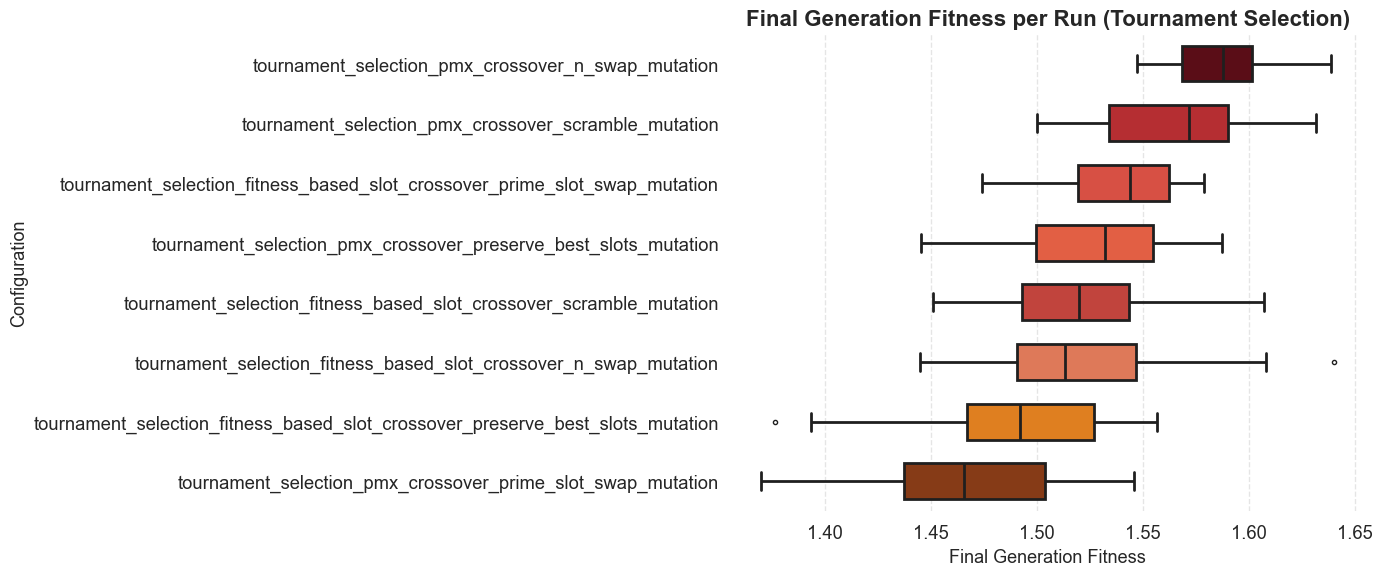

In [646]:
plot_final_fitness_boxplots(fitness_dfs, title_suffix='All Selection Methods')
plot_final_fitness_boxplots(fitprop_fitness_dfs, title_suffix='Fitness-Proportionate Selection')
plot_final_fitness_boxplots(ranking_fitness_dfs, title_suffix='Ranking Selection')
plot_final_fitness_boxplots(tournament_fitness_dfs, title_suffix='Tournament Selection')

## **2.3** Operators' Isolated Comparison

In [647]:
selection_names = ["fitness_proportionate_selection", "ranking_selection", "tournament_selection"]
crossover_names = ["pmx_crossover", "fitness_based_slot_crossover"]
mutation_names = ["n_swap_mutation", "scramble_mutation", "prime_slot_swap_mutation", "preserve_best_slots_mutation"]

### **2.3.1** Approach 1 - Aggregate Raw Runs

Group all runs that use a particular hyperparameter value and compute the median best fitness across those runs.

In [648]:
selection_fit_dfs = {}
crossover_fit_dfs = {}
mutation_fit_dfs = {}

# Combine all isolated runs using a given selection
for selection_name in selection_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if selection_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        selection_fit_dfs[selection_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

# Combine all isolated runs using a given crossover
for crossover_name in crossover_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if crossover_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        crossover_fit_dfs[crossover_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

# Combine all isolated runs using a given mutation
for mutation_name in mutation_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if mutation_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        mutation_fit_dfs[mutation_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

In [649]:
plot_component_comparisons(selection_fit_dfs, crossover_fit_dfs, mutation_fit_dfs)

### **2.3.2** Approach 2 - Aggregate by Configuration

First calculate the median result for each configuration, and then take the median of those medians for the ones sharing the same hyperparameter value.

In [650]:
selection_medians = {k: [] for k in selection_names}
crossover_medians = {k: [] for k in crossover_names}
mutation_medians = {k: [] for k in mutation_names}

for df_name, df in fitness_dfs.items():
    for selection_name in selection_names:
        if selection_name in df_name:
            # Calculate median best fitness over generations for configuration using this selection
            selection_medians[selection_name].append(df.median(axis=0).values)
    for crossover_name in crossover_names:
        if crossover_name in df_name:
            # Calculate median best fitness over generations for configuration using this crossover
            crossover_medians[crossover_name].append(df.median(axis=0).values)
    for mutation_name in mutation_names:
        if mutation_name in df_name:
            # Calculate median best fitness over generations for configuration using this mutation
            mutation_medians[mutation_name].append(df.median(axis=0).values)

# Final median curves: median of medians across configurations
selection_curves = {k: np.median(v, axis=0) for k, v in selection_medians.items() if v}
crossover_curves = {k: np.median(v, axis=0) for k, v in crossover_medians.items() if v}
mutation_curves = {k: np.median(v, axis=0) for k, v in mutation_medians.items() if v}

In [651]:
plot_component_comparisons_from_curves(selection_curves , crossover_curves, mutation_curves)

## **2.4** Wilcoxon Test

In [652]:
# Collect final generation fitness for each configuration
final_gen_fitness = {
    name: df.iloc[:, -1].values  # last column = final generation
    for name, df in fitness_dfs.items()
}

# Create a sorted list of all configuration names
all_configs = sorted(final_gen_fitness.keys())

p_values_df = pd.DataFrame(index=all_configs, columns=all_configs)

#fill the p-values from Wilcoxon test
for (cfg1, cfg2) in combinations(all_configs, 2):
    stat, p = wilcoxon(final_gen_fitness[cfg1], final_gen_fitness[cfg2])
    p_values_df.loc[cfg1, cfg2] = p
    p_values_df.loc[cfg2, cfg1] = p

# the diagonal should be 1.0 (self-comparison)
for cfg in all_configs:
    p_values_df.loc[cfg, cfg] = 1.0

p_values_df = p_values_df.astype(float)

print("Wilcoxon p-values matrix (α = 0.05):")
display(p_values_df)

# Highlight significant differences
significant = p_values_df < 0.05
print("\nSignificant differences (True = p < 0.05):")
display(significant)

Wilcoxon p-values matrix (α = 0.05):


,fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation,ranking_selection_fitness_based_slot_crossover_n_swap_mutation,ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,...,ranking_selection_pmx_crossover_prime_slot_swap_mutation,ranking_selection_pmx_crossover_scramble_mutation,tournament_selection_fitness_based_slot_crossover_n_swap_mutation,tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,tournament_selection_fitness_based_slot_crossover_scramble_mutation,tournament_selection_pmx_crossover_n_swap_mutation,tournament_selection_pmx_crossover_preserve_best_slots_mutation,tournament_selection_pmx_crossover_prime_slot_swap_mutation,tournament_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,1.000000e+00,5.837571e-01,3.098481e-02,8.552717e-01,5.158484e-01,6.666471e-02,4.044945e-01,8.552717e-01,2.206468e-01,2.054097e-01,...,2.607703e-08,3.790483e-06,5.978078e-01,1.003974e-01,2.020182e-03,8.552717e-01,3.725290e-09,7.672122e-02,2.688542e-05,1.991168e-06
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,5.837571e-01,1.000000e+00,2.054097e-01,1.000000e+00,4.399668e-01,3.453673e-02,3.284699e-01,5.425279e-01,2.988441e-01,5.978078e-01,...,1.862645e-08,2.688542e-05,9.676736e-01,4.971012e-02,1.966082e-02,8.235769e-01,5.718321e-07,3.817984e-01,1.824461e-05,1.886003e-04
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,3.098481e-02,2.054097e-01,1.000000e+00,1.094321e-01,6.194992e-03,2.020182e-03,6.194992e-03,4.725905e-02,4.044945e-01,3.707406e-01,...,1.862645e-09,5.587935e-09,1.459995e-01,3.127549e-04,5.698576e-01,1.293531e-01,2.762303e-06,8.393927e-01,2.348796e-06,9.931510e-03
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,8.552717e-01,1.000000e+00,1.094321e-01,1.000000e+00,2.988441e-01,1.048399e-01,1.909295e-01,6.701806e-01,1.909295e-01,4.399668e-01,...,1.862645e-09,7.994473e-06,9.032265e-01,8.406548e-02,1.718590e-03,9.353987e-01,2.551824e-07,3.387418e-01,1.597777e-05,1.396611e-05
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,5.158484e-01,4.399668e-01,6.194992e-03,2.988441e-01,1.000000e+00,2.621223e-01,9.676736e-01,5.978078e-01,5.492163e-02,1.094321e-01,...,1.303852e-07,1.373943e-04,2.988441e-01,2.285528e-01,1.864007e-03,5.291052e-01,5.587935e-09,4.490721e-02,9.301122e-03,1.597777e-05
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,6.666471e-02,3.453673e-02,2.020182e-03,1.048399e-01,2.621223e-01,1.000000e+00,3.387418e-01,1.141767e-01,4.338233e-03,1.453802e-02,...,3.239140e-06,3.800932e-04,2.341014e-02,7.765688e-01,1.698975e-04,1.059826e-02,1.862645e-09,3.475156e-03,7.111456e-03,1.419336e-06
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,4.044945e-01,3.284699e-01,6.194992e-03,1.909295e-01,9.676736e-01,3.387418e-01,1.000000e+00,3.598779e-01,2.478605e-02,7.672122e-02,...,4.656613e-08,2.562888e-04,1.771927e-01,3.707406e-01,6.084088e-04,2.893662e-01,1.862645e-09,1.283373e-02,7.111456e-03,1.192093e-06
fitness_proportionate_selection_pmx_crossover_scramble_mutation,8.552717e-01,5.425279e-01,4.725905e-02,6.701806e-01,5.978078e-01,1.141767e-01,3.598779e-01,1.000000e+00,1.048399e-01,1.980758e-01,...,1.862645e-09,4.712492e-07,6.701806e-01,9.61


Significant differences (True = p < 0.05):


,fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation,ranking_selection_fitness_based_slot_crossover_n_swap_mutation,ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,...,ranking_selection_pmx_crossover_prime_slot_swap_mutation,ranking_selection_pmx_crossover_scramble_mutation,tournament_selection_fitness_based_slot_crossover_n_swap_mutation,tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,tournament_selection_fitness_based_slot_crossover_scramble_mutation,tournament_selection_pmx_crossover_n_swap_mutation,tournament_selection_pmx_crossover_preserve_best_slots_mutation,tournament_selection_pmx_crossover_prime_slot_swap_mutation,tournament_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,False,False,False,False,False,True,False,False,False,False,...,True,True,False,True,True,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,True,False,False,False,True,True,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,True,True,True
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,False,True,True,False,False,False,False,False,True,True,...,True,True,True,False,True,True,True,True,True,True
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,False,False,True,False,False,False,False,False,True,False,...,True,True,False,False,True,False,True,True,True,True
fitness_proportionate_selection_pmx_crossover_scramble_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
ranking_selection_fitness_based_slot_crossover_n_swap_mutation,False,False,False,False,False,True,True,False,False,False,...,True,True,False,True,False,False,True,False,True,True
ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,False,False,False,False,False,True,False,False,False,False,...,True,True,False,True,True,False,True,False,True,True


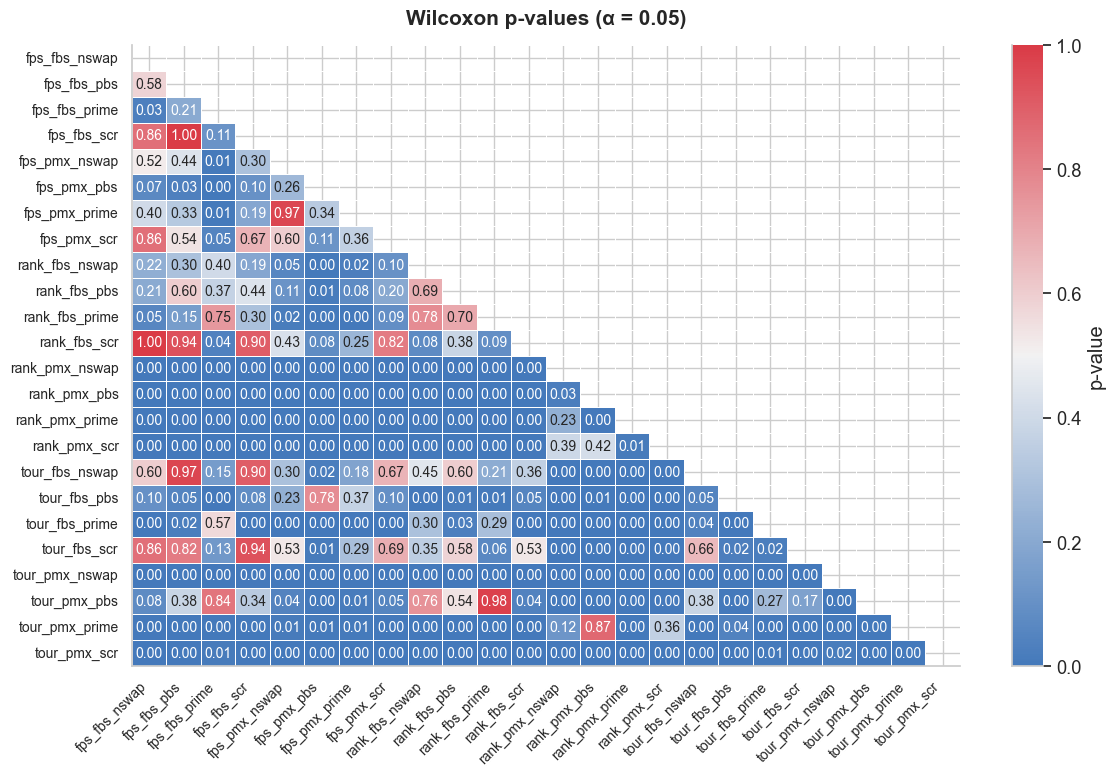

In [637]:
# Mask the upper triangle to reduce redundancy
mask = np.triu(np.ones_like(p_values_df, dtype=bool))

# Plot
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(
    p_values_df,
    mask=mask,
    cmap=cmap,
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.6,
    linecolor='white',
    annot_kws={"size": 10},
    cbar_kws={'label': 'p-value'}
)

plt.title("Wilcoxon p-values (α = 0.05)", fontsize=15, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
plot_statistical_distance_graph(best_configs, final_gen_fitness, p_values_df)



<div class="alert alert-block alert-success">

# **3.** **Algorithms Comparison: Genetic Algortihm vs Simmulated Annealing and Hill Climbing**

<div>


In [653]:
df_hc = pd.read_csv("results/hill_climbing.csv")
df_sa = pd.read_csv("results/simmulated_annealing.csv")

best_config_label = 'tournament_selection_pmx_crossover_n_swap_mutation'
ga_best_fitnesses = [ast.literal_eval(gen_str)[-1] for gen_str in df_ga.loc[df_ga['Config'] == best_config_label, 'Gens_Best_Fitness']]
hc_best_fitnesses = df_hc["hc_fitness"].tolist()
sa_best_fitnesses = df_sa["sa_fitness"].tolist()

## **3.1** Standard Deviation Fitness over Runs

/var/folders/19/rxl10lh147s73036f239kkmm0000gn/T/ipykernel_8835/1392202214.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




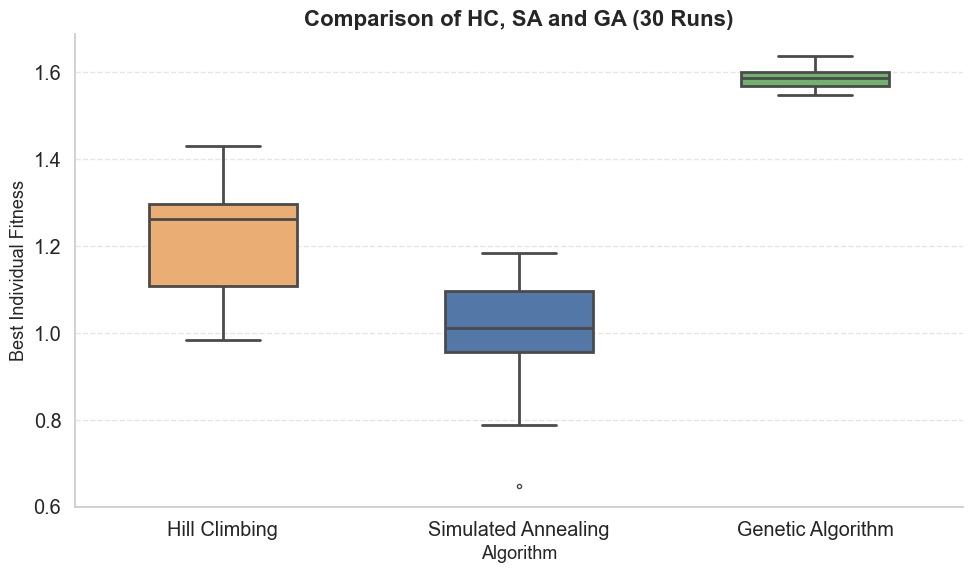

In [654]:
palette = {
    'Hill Climbing': '#fdae61',         
    'Simulated Annealing': '#4575b4',   
    'Genetic Algorithm': '#66bd63'      
}

df = pd.DataFrame({
    'value': hc_best_fitnesses + sa_best_fitnesses + ga_best_fitnesses,
    'group': (
        ['Hill Climbing'] * len(hc_best_fitnesses) +
        ['Simulated Annealing'] * len(sa_best_fitnesses) +
        ['Genetic Algorithm'] * len(ga_best_fitnesses))})

sns.set_theme(style="whitegrid", font_scale=1.3)
algo_palette = {
    'Hill Climbing': '#fdae61',
    'Simulated Annealing': '#4575b4',
    'Genetic Algorithm': '#66bd63'
}

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='group', 
    y='value', 
    data=df, 
    width=0.5, 
    linewidth=2, 
    fliersize=3,
    palette=algo_palette
)

plt.title('Comparison of HC, SA and GA (30 Runs)', fontsize=16, weight='bold')
plt.xlabel('Algorithm', fontsize=13)
plt.ylabel('Best Individual Fitness', fontsize=13)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

## **3.2** Wilcoxon Test

In [655]:
# Unique algorithm names
algorithms = df['group'].unique()

# Create dictionary with algorithm name -> fitness values
grouped_fitness = {
    algo: df[df['group'] == algo]['value'].values
    for algo in algorithms
}

# Initialize p-values DataFrame
p_values_df = pd.DataFrame(index=algorithms, columns=algorithms)

# Perform Wilcoxon signed-rank tests between each pair
for algo1, algo2 in combinations(algorithms, 2):
    stat, p = wilcoxon(grouped_fitness[algo1], grouped_fitness[algo2])
    p_values_df.loc[algo1, algo2] = p
    p_values_df.loc[algo2, algo1] = p

# Set diagonal to 1.0 (self-comparison)
for algo in algorithms:
    p_values_df.loc[algo, algo] = 1.0

# Convert to float
p_values_df = p_values_df.astype(float)

# Display results
print("Wilcoxon p-values matrix (α = 0.05):")
display(p_values_df)

# Show where differences are statistically significant
significant = p_values_df < 0.05
print("\nSignificant differences (True = p < 0.05):")
display(significant)

Wilcoxon p-values matrix (α = 0.05):


,Hill Climbing,Simulated Annealing,Genetic Algorithm
Hill Climbing,1.000000e+00,7.994473e-06,1.862645e-09
Simulated Annealing,7.994473e-06,1.000000e+00,1.862645e-09
Genetic Algorithm,1.862645e-09,1.862645e-09,1.000000e+00



Significant differences (True = p < 0.05):


,Hill Climbing,Simulated Annealing,Genetic Algorithm
Hill Climbing,False,True,True
Simulated Annealing,True,False,True
Genetic Algorithm,True,True,False


/var/folders/19/rxl10lh147s73036f239kkmm0000gn/T/ipykernel_8835/3226026102.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



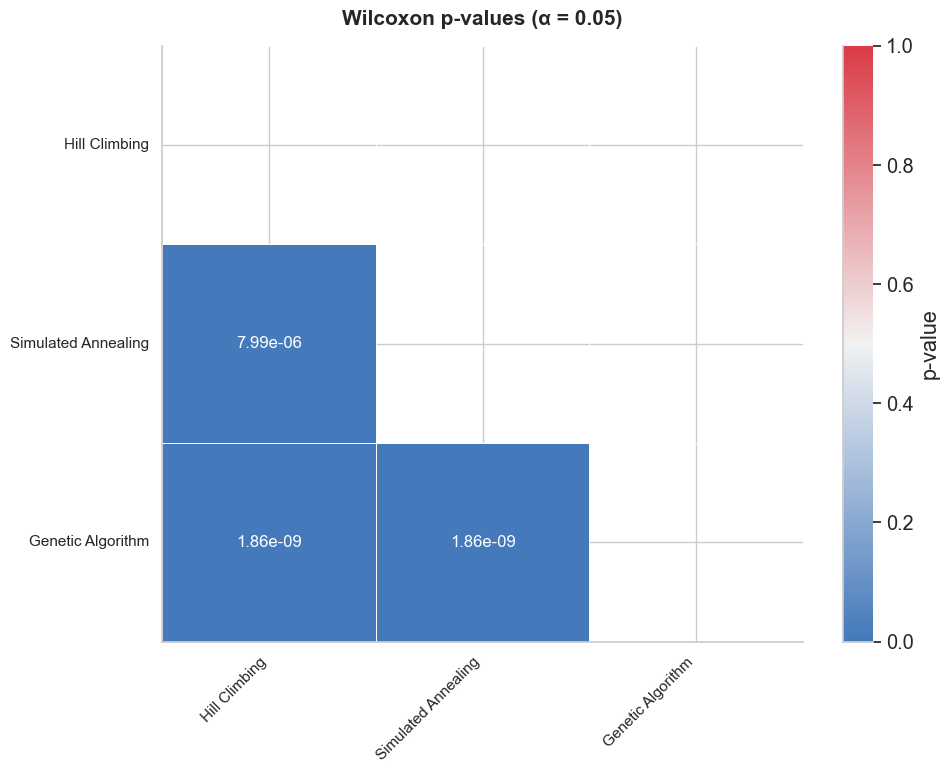

In [656]:
# Mask the upper triangle to reduce redundancy
mask = np.triu(np.ones_like(p_values_df, dtype=bool))

# Create a formatted annotation DataFrame with scientific notation
annot_df = p_values_df.copy()
annot_df = annot_df.applymap(lambda x: f"{x:.2e}" if x < 0.01 else f"{x:.2f}")

# Plot
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(
    p_values_df.astype(float),
    mask=mask,
    cmap=cmap,
    vmin=0,
    vmax=1,
    annot=annot_df,
    fmt="",
    linewidths=0.6,
    linecolor='white',
    annot_kws={"size": 12},  # Increased font size here
    cbar_kws={'label': 'p-value'}
)

plt.title("Wilcoxon p-values (α = 0.05)", fontsize=15, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

# **4.** **Fine-tuned G.A Solution Analysis**

<div>


## **4.1** Create Dictionary with Fitnesses Obtained for Each Combination

We have to combine all the results obtained in reach run of the configurations for each selection method.

In [657]:
df_hp_tuning = pd.read_csv("results/ga/results_hp_tuning.csv")

In [658]:
fitness_dfs_hp = {}

for _, row in df_hp_tuning.iterrows():
    # Build config name from hyperparameters
    config_name = (
        f"xo{row['xo_prob']:.2f}_mut{row['mut_prob']:.2f}_n{int(row['n_swaps'])}_tour{int(row['tournament_size'])}"
    )
    
    # Parse the fitness history (may be string or list)
    fitness_history = row['fitness_history']
    
    # If it's a string, parse it
    if isinstance(fitness_history, str):
        fitness_history = json.loads(fitness_history)
    
    # Create the DataFrame
    fitness_df = pd.DataFrame(fitness_history)
    fitness_dfs_hp[config_name] = fitness_df

In [659]:
for key in fitness_dfs_hp.keys():
    print(key)

xo0.91_mut0.32_n3_tour4
xo0.65_mut0.25_n3_tour8
xo0.98_mut0.36_n4_tour3
xo0.83_mut0.31_n3_tour4
xo0.71_mut0.12_n2_tour9
xo0.66_mut0.14_n4_tour4
xo0.71_mut0.27_n2_tour9
xo0.94_mut0.28_n4_tour8
xo0.63_mut0.06_n4_tour3
xo0.99_mut0.31_n5_tour4
xo0.62_mut0.28_n3_tour8
xo0.71_mut0.19_n5_tour6
xo0.76_mut0.20_n5_tour8
xo0.84_mut0.36_n2_tour2
xo0.86_mut0.14_n3_tour10
xo0.63_mut0.40_n5_tour6
xo0.62_mut0.30_n5_tour7
xo0.63_mut0.09_n4_tour9
xo0.70_mut0.08_n5_tour8
xo0.80_mut0.23_n3_tour7
xo0.72_mut0.34_n3_tour2
xo0.91_mut0.13_n4_tour8
xo0.71_mut0.35_n3_tour2
xo0.71_mut0.39_n2_tour4
xo0.91_mut0.26_n4_tour10


Checking if the format is correct:

In [660]:
fitness_dfs_hp["xo0.84_mut0.36_n2_tour2"]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.311039,1.311039,1.311039,1.317806,1.317806,1.327349,1.387234,1.427834,1.427834,1.435691,...,1.664487,1.664487,1.664487,1.664487,1.664487,1.664487,1.664487,1.664487,1.664487,1.664487
1,1.301181,1.333324,1.333324,1.333324,1.333324,1.348438,1.348438,1.348438,1.371804,1.371804,...,1.625774,1.625774,1.625774,1.625774,1.625774,1.625774,1.625774,1.641488,1.641488,1.641488
2,1.224752,1.254267,1.304720,1.364720,1.364720,1.364720,1.372578,1.379720,1.395746,1.427605,...,1.668658,1.668658,1.668658,1.668658,1.668658,1.668658,1.668658,1.668658,1.668658,1.668658
3,1.274812,1.274812,1.274812,1.307152,1.307152,1.307152,1.307152,1.307152,1.307152,1.308612,...,1.645659,1.645659,1.645659,1.648516,1.648516,1.648516,1.648516,1.648516,1.648516,1.648516
4,1.277073,1.277073,1.277073,1.313461,1.313461,1.395265,1.395265,1.395265,1.395265,1.395265,...,1.634258,1.634258,1.634258,1.634258,1.634258,1.634258,1.634258,1.636401,1.636401,1.636401
5,1.289432,1.331126,1.331126,1.331126,1.350861,1.367115,1.367115,1.412321,1.412321,1.412321,...,1.604176,1.604176,1.604176,1.604176,1.622033,1.622033,1.622033,1.622033,1.622033,1.622033
6,1.307830,1.307830,1.317546,1.365403,1.365403,1.365403,1.365403,1.394830,1.394830,1.403947,...,1.610430,1.610430,1.610430,1.619574,1.621145,1.621145,1.625888,1.625888,1.625888,1.625888
7,1.258612,1.361950,1.361950,1.361950,1.418379,1.418379,1.418379,1.418379,1.418379,1.479807,...,1.603745,1.603745,1.603745,1.603745,1.603745,1.603745,1.615888,1.615888,1.615888,1.615888
8,1.245751,1.259606,1.259606,1.310522,1.311492,1.311492,1.387207,1.387207,1.387207,1.387207,...,1.627546,1.627546,1.627546,1.627546,1.627546,1.627546,1.627546,1.627546,1.627546,1.627546
9,1.228438,1.228438,1.296927,1.332609,1.393667,1.393667,1.393667,1.393667,1.393667,1.393667,...,1.622001,1.622001,1.622001,1.622001,1.622001,1.622001,1.622001,1.622001,1.622001,1.622001


## **4.2** Configurations' Comparison

### **4.2.1** Collecting the data

In [661]:
# fitprop_fitness_dfs = {
#     k: v for k, v in fitness_dfs.items()
#     if k.startswith('fitness_proportionate_selection')
# }

# ranking_fitness_dfs = {
#     k: v for k, v in fitness_dfs.items()
#     if k.startswith('ranking_selection')
# }

# tournament_fitness_dfs = {
#     k: v for k, v in fitness_dfs.items()
#     if k.startswith('tournament_selection')
# }

### **4.2.2** Mean/Median Fitness over Generation Line Charts

In [662]:
plot_fitness(fitness_dfs_hp, title_suffix='All Configurations')
# plot_fitness(fitprop_fitness_dfs, title_suffix='Fitness-Proportionate Selection')
# plot_fitness(ranking_fitness_dfs, title_suffix='Ranking Selection')
# plot_fitness(tournament_fitness_dfs, title_suffix='Tournament Selection')

### **4.2.3** Standard Deviation (Box Plot)

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




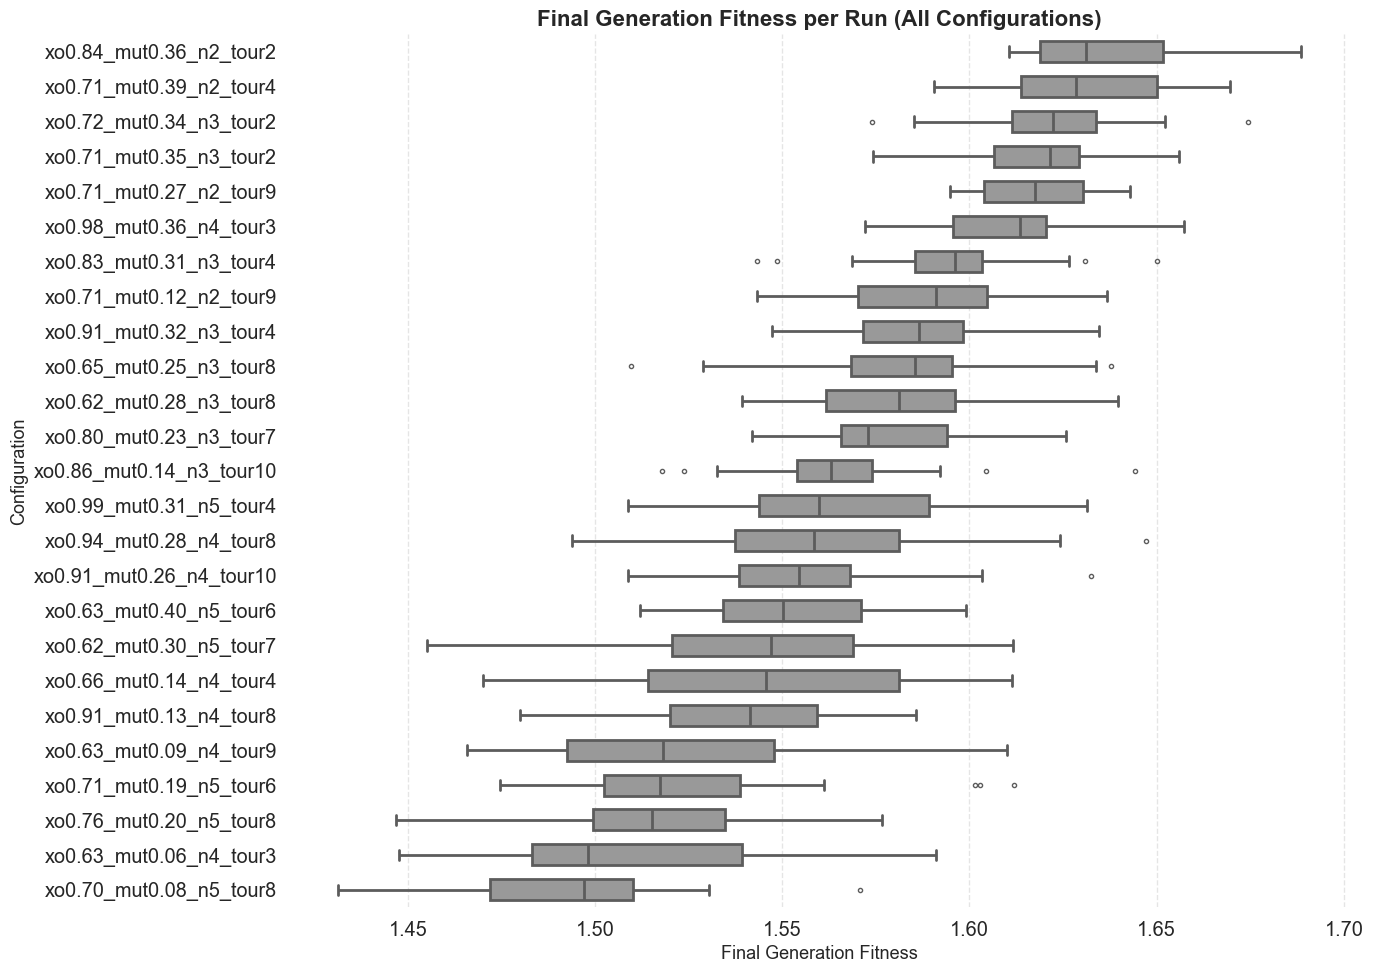

In [663]:
plot_final_fitness_boxplots(fitness_dfs_hp, title_suffix='All Configurations')
# plot_final_fitness_boxplots(fitprop_fitness_dfs, title_suffix='Fitness-Proportionate Selection')
# plot_final_fitness_boxplots(ranking_fitness_dfs, title_suffix='Ranking Selection')
# plot_final_fitness_boxplots(tournament_fitness_dfs, title_suffix='Tournament Selection')

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:497: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




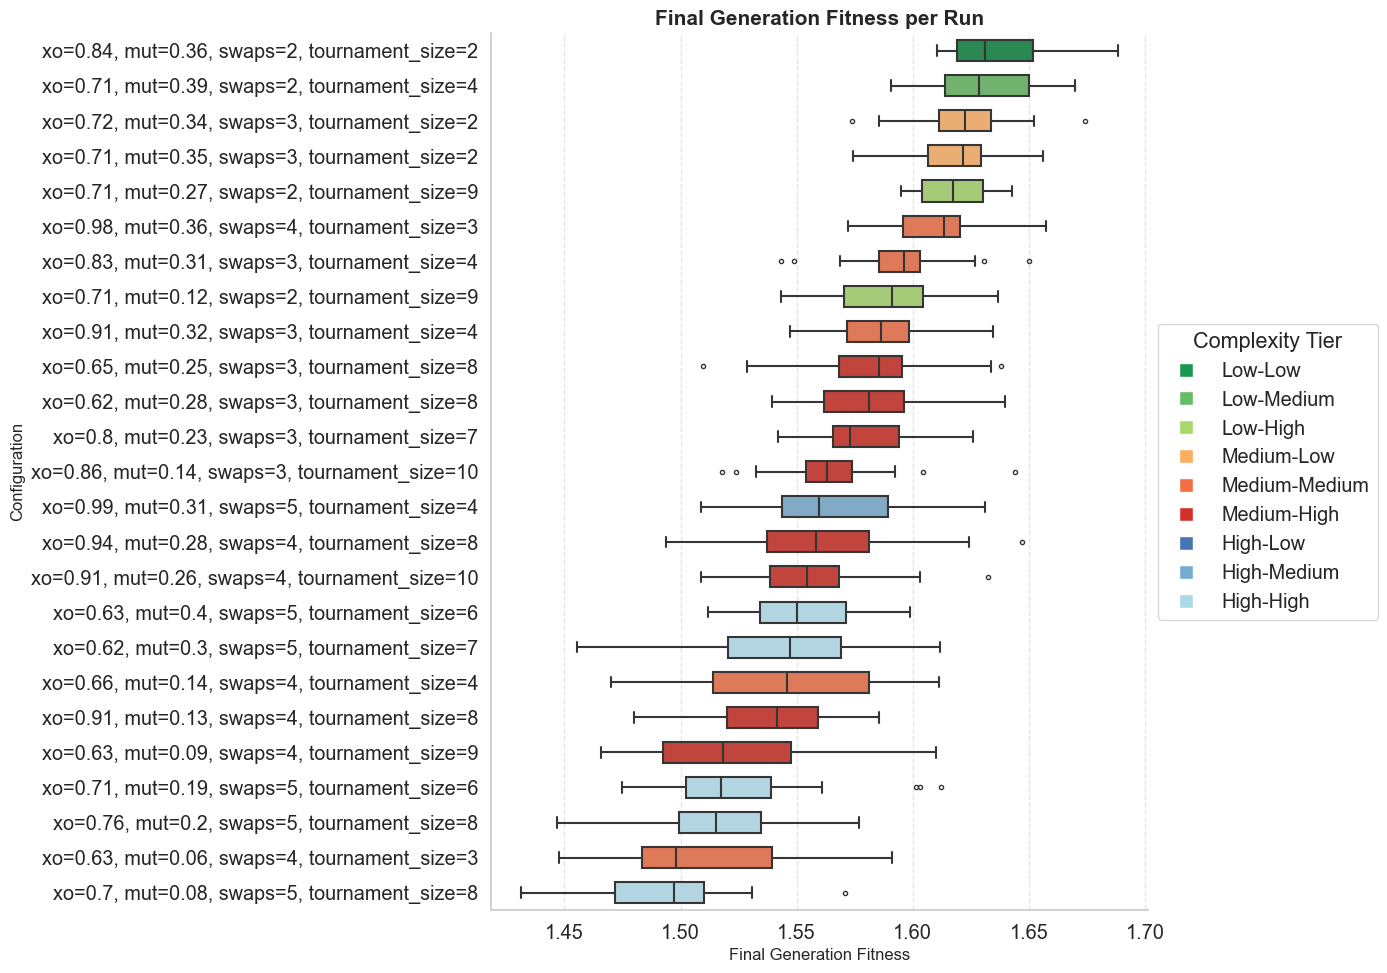

In [664]:
plot_fine_tune(df_hp_tuning)

## **4.4** Wilcoxon Test

In [665]:
# Collect final generation fitness for each configuration
final_gen_fitness = {
    name: df.iloc[:, -1].values
    for name, df in fitness_dfs_hp.items()
}

all_configs = list(final_gen_fitness.keys())

# Initialize the p-values DataFrame
p_values_df = pd.DataFrame(index=all_configs, columns=all_configs)

# Fill the p-values using the Wilcoxon test
for cfg1, cfg2 in combinations(all_configs, 2):
    stat, p = wilcoxon(final_gen_fitness[cfg1], final_gen_fitness[cfg2])
    p_values_df.loc[cfg1, cfg2] = p
    p_values_df.loc[cfg2, cfg1] = p

# Diagonal values (self-comparison) set to 1.0
for cfg in all_configs:
    p_values_df.loc[cfg, cfg] = 1.0

# Convert to float
p_values_df = p_values_df.astype(float).round(3)

# Output results
print("Wilcoxon p-values matrix (α = 0.05):")
display(p_values_df)

# Highlight statistically significant differences
significant = p_values_df < 0.05
print("\nSignificant differences (True = p < 0.05):")
display(significant)

Wilcoxon p-values matrix (α = 0.05):


,xo0.91_mut0.32_n3_tour4,xo0.65_mut0.25_n3_tour8,xo0.98_mut0.36_n4_tour3,xo0.83_mut0.31_n3_tour4,xo0.71_mut0.12_n2_tour9,xo0.66_mut0.14_n4_tour4,xo0.71_mut0.27_n2_tour9,xo0.94_mut0.28_n4_tour8,xo0.63_mut0.06_n4_tour3,xo0.99_mut0.31_n5_tour4,...,xo0.63_mut0.40_n5_tour6,xo0.62_mut0.30_n5_tour7,xo0.63_mut0.09_n4_tour9,xo0.70_mut0.08_n5_tour8,xo0.80_mut0.23_n3_tour7,xo0.72_mut0.34_n3_tour2,xo0.91_mut0.13_n4_tour8,xo0.71_mut0.35_n3_tour2,xo0.71_mut0.39_n2_tour4,xo0.91_mut0.26_n4_tour10
xo0.91_mut0.32_n3_tour4,1.000,0.382,0.000,0.229,0.477,0.000,0.000,0.000,0.000,0.003,...,0.000,0.000,0.000,0.000,0.040,0.000,0.000,0.000,0.000,0.000
xo0.65_mut0.25_n3_tour8,0.382,1.000,0.000,0.135,0.213,0.000,0.000,0.022,0.000,0.036,...,0.000,0.000,0.000,0.000,0.503,0.000,0.000,0.000,0.000,0.001
xo0.98_mut0.36_n4_tour3,0.000,0.000,1.000,0.002,0.002,0.000,0.171,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.070,0.000,0.213,0.003,0.000
xo0.83_mut0.31_n3_tour4,0.229,0.135,0.002,1.000,0.490,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000
xo0.71_mut0.12_n2_tour9,0.477,0.213,0.002,0.490,1.000,0.000,0.000,0.001,0.000,0.005,...,0.000,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000
xo0.66_mut0.14_n4_tour4,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.205,0.001,0.105,...,0.516,0.871,0.004,0.000,0.003,0.000,0.465,0.000,0.000,0.177
xo0.71_mut0.27_n2_tour9,0.000,0.000,0.171,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.339,0.000,0.715,0.022,0.000
xo0.94_mut0.28_n4_tour8,0.000,0.022,0.000,0.000,0.001,0.205,0.000,1.000,0.000,0.543,...,0.328,0.096,0.000,0.000,0.013,0.000,0.002,0.000,0.000,0.490
xo0.63_mut0.06_n4_tour3,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,1.000,0.000,...,0.001,0.010,0.171,0.077,0.000,0.000,0.001,0.000,0.000,0.000
xo0.99_mut0.31_n5_tour4,0.003,0.036,0.000,0.000,0.005,0.105,0.000,0.543,0.000,1.000,...,0.171,0.055,0.000,0.000,0.052,0.000,0.001,0.000,0.000,0.135



Significant differences (True = p < 0.05):


,xo0.91_mut0.32_n3_tour4,xo0.65_mut0.25_n3_tour8,xo0.98_mut0.36_n4_tour3,xo0.83_mut0.31_n3_tour4,xo0.71_mut0.12_n2_tour9,xo0.66_mut0.14_n4_tour4,xo0.71_mut0.27_n2_tour9,xo0.94_mut0.28_n4_tour8,xo0.63_mut0.06_n4_tour3,xo0.99_mut0.31_n5_tour4,...,xo0.63_mut0.40_n5_tour6,xo0.62_mut0.30_n5_tour7,xo0.63_mut0.09_n4_tour9,xo0.70_mut0.08_n5_tour8,xo0.80_mut0.23_n3_tour7,xo0.72_mut0.34_n3_tour2,xo0.91_mut0.13_n4_tour8,xo0.71_mut0.35_n3_tour2,xo0.71_mut0.39_n2_tour4,xo0.91_mut0.26_n4_tour10
xo0.91_mut0.32_n3_tour4,False,False,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
xo0.65_mut0.25_n3_tour8,False,False,True,False,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
xo0.98_mut0.36_n4_tour3,True,True,False,True,True,True,False,True,True,True,...,True,True,True,True,True,False,True,False,True,True
xo0.83_mut0.31_n3_tour4,False,False,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
xo0.71_mut0.12_n2_tour9,False,False,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
xo0.66_mut0.14_n4_tour4,True,True,True,True,True,False,True,False,True,False,...,False,False,True,True,True,True,False,True,True,False
xo0.71_mut0.27_n2_tour9,True,True,False,True,True,True,False,True,True,True,...,True,True,True,True,True,False,True,False,True,True
xo0.94_mut0.28_n4_tour8,True,True,True,True,True,False,True,False,True,False,...,False,False,True,True,True,True,True,True,True,False
xo0.63_mut0.06_n4_tour3,True,True,True,True,True,True,True,True,False,True,...,True,True,False,False,True,True,True,True,True,True
xo0.99_mut0.31_n5_tour4,True,True,True,True,True,False,True,False,True,False,...,False,False,True,True,False,True,True,True,True,False


In [666]:
p_values_df.loc["xo0.84_mut0.36_n2_tour2", "xo0.71_mut0.39_n2_tour4"]

0.36

In [667]:
# plot_statistical_distance_graph(all_configs, final_gen_fitness, p_values_df)

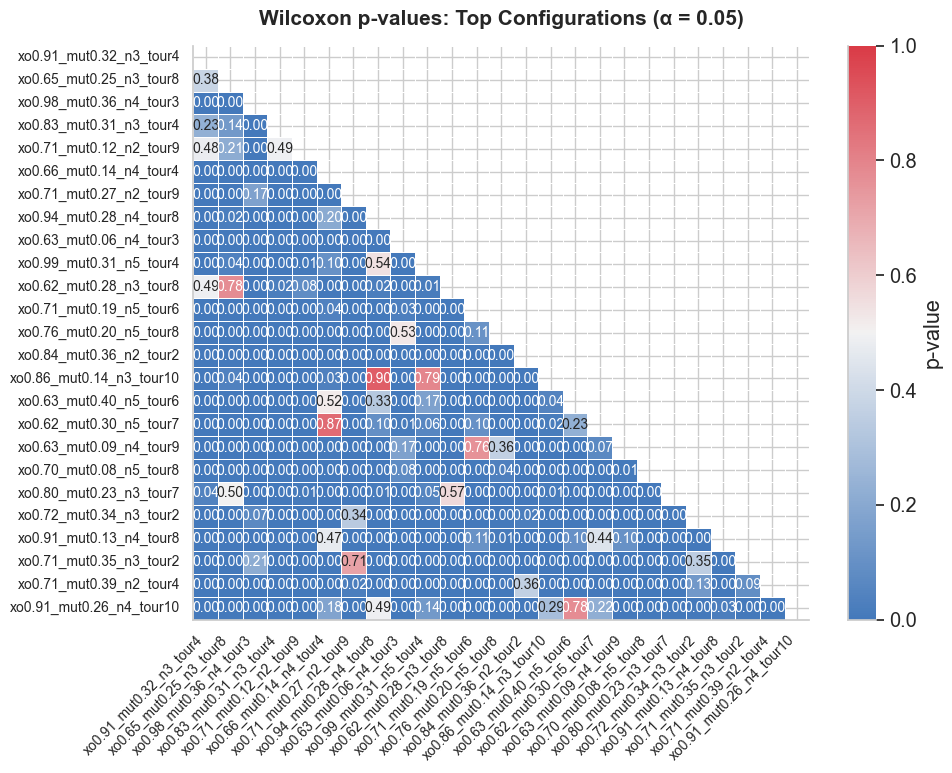

In [668]:
# Mask the upper triangle to reduce redundancy
mask = np.triu(np.ones_like(p_values_df, dtype=bool))

# Plot
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(
    p_values_df,
    mask=mask,
    cmap=cmap,
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.6,
    linecolor='white',
    annot_kws={"size": 10},
    cbar_kws={'label': 'p-value'}
)

plt.title("Wilcoxon p-values: Top Configurations (α = 0.05)", fontsize=15, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

# **5.** Adaptive Genetic Algorithm with Dynamic Mutation, Selection Pressure and Partial Replacement

<div>

In [669]:
df_adaptive_ga = pd.read_csv("results/ga/fitness_adaptive_ga.csv", index_col=0)

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:554: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




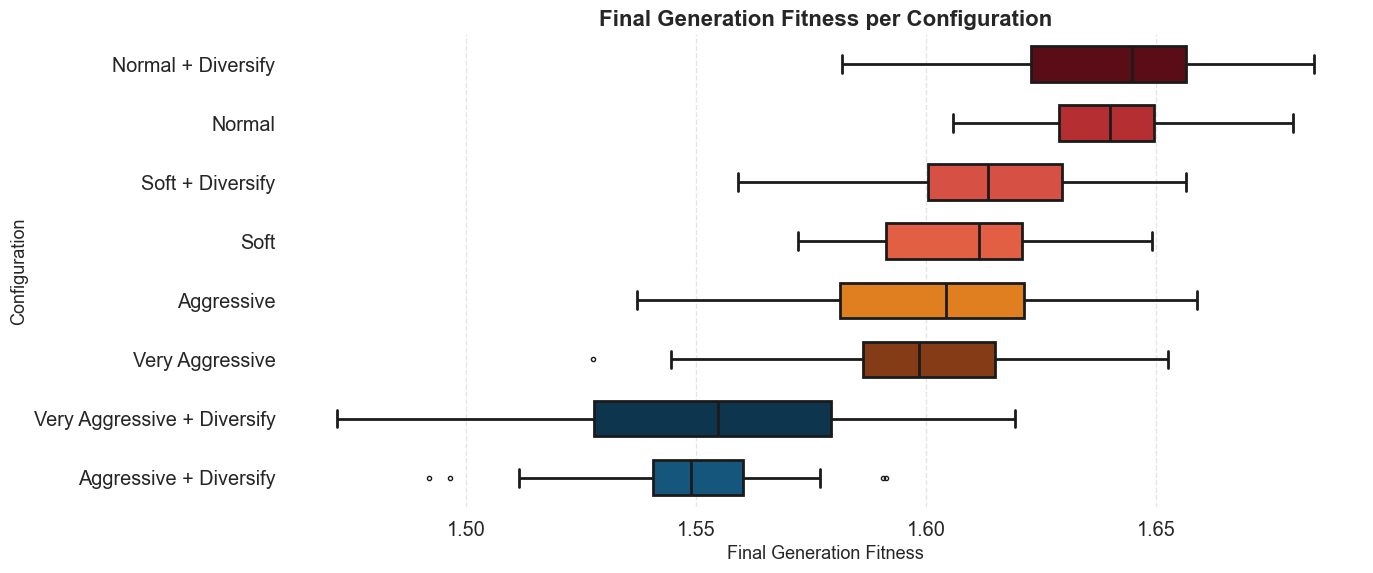

In [670]:
plot_final_fitness_adaptive_ga(df_adaptive_ga)

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:612: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



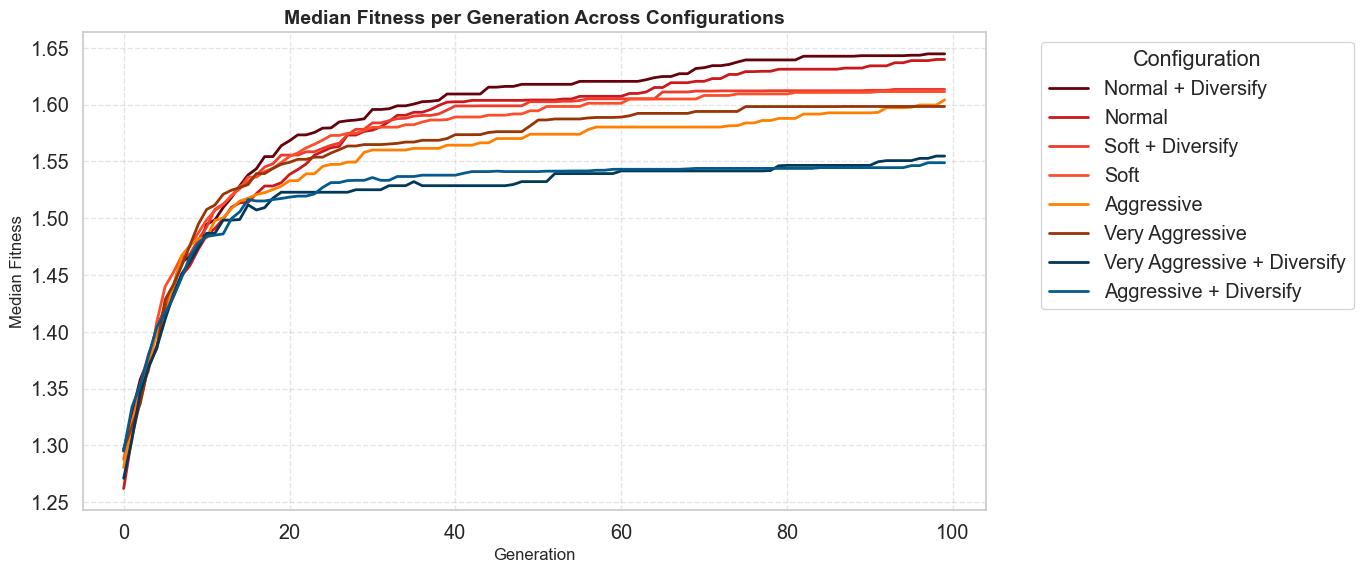

In [671]:
plot_median_fitness_over_generations(df_adaptive_ga)

In [672]:
df_clean = df_adaptive_ga.copy()
df_clean.columns = df_clean.columns.str.replace(r"\.\d+$", "", regex=True)
normal_div_cols = [col for col in df_clean.columns if col == "Normal + Diversify"]

final_gen_values = df_clean[normal_div_cols].iloc[-1]
median_final_fitness = final_gen_values.median()

print(f"Median final fitness of Normal + Diversify: {median_final_fitness:.4f}")

Median final fitness of Normal + Diversify: 1.6447
